<a href="https://colab.research.google.com/github/angrytako/deep-learning-egovision/blob/master/main_project_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**READ carefully!**

To develop the project, you need to download the RGB frames for a subset of EPIC-Kitchens-55 (participants P08, P01 and P22) from [here](https://politoit-my.sharepoint.com/:f:/g/personal/simone_peirone_polito_it/EqCmaEAi2oBEqEqzBZ-pIA0Bke4EGNkUEhqwApEhUp9tDw?e=DtSbMP) (you need to login with your Polito credentials). 

You also need to the pretrained checkpoints for each domain from [here](https://politoit-my.sharepoint.com/:f:/g/personal/simone_peirone_polito_it/ErdsZhvmR65Lun5_5O0-l5sBTPjCCZZq2f700Tj_CNzjTQ?e=L1yflf).

Upload the dataset on your Google Drive to access it from Google Colab.

**NOTE**: As the dataset is quite heavy, we stronly suggest you to implement and test all your code on one for the three dataset. Then, once you are sure everything works, repeat the experiments on the remaining two datasets.


In [2]:
import os

In [3]:
# As read and write operations from google drive are slow, we suggest to copy and unzip
# the dataset in a local directory on the Colab's machine.
!mkdir -p mkdir -p ek_data/frames

In [4]:
%%bash
# Copy the *.tar.gz files of Epic-Kitchens
# TODO: replace with your path
cp /content/drive/MyDrive/MLDP_Project/Ilaria/PROGETTO_MLDL/P01/*.tar.gz ./ek_data

In [5]:
%%bash
for file in ./ek_data/*.tar.gz; do
  fn=$(basename $file)
  fn=${fn/.tar.gz/}
  ls -lah $file
  mkdir -p ek_data/frames/$fn
  tar xf $file --directory=ek_data/frames/$fn
done


-rw------- 1 root root 1.1G May  9 12:48 ./ek_data/P01_01.tar.gz
-rw------- 1 root root 390M May  9 12:48 ./ek_data/P01_02.tar.gz
-rw------- 1 root root 44M May  9 12:48 ./ek_data/P01_03.tar.gz
-rw------- 1 root root 45M May  9 12:48 ./ek_data/P01_04.tar.gz
-rw------- 1 root root 420M May  9 12:48 ./ek_data/P01_05.tar.gz
-rw------- 1 root root 361M May  9 12:48 ./ek_data/P01_06.tar.gz
-rw------- 1 root root 87M May  9 12:48 ./ek_data/P01_07.tar.gz
-rw------- 1 root root 57M May  9 12:48 ./ek_data/P01_08.tar.gz
-rw------- 1 root root 1.7G May  9 12:48 ./ek_data/P01_09.tar.gz
-rw------- 1 root root 90M May  9 12:48 ./ek_data/P01_10.tar.gz
-rw------- 1 root root 355M May  9 12:49 ./ek_data/P01_11.tar.gz
-rw------- 1 root root 88M May  9 12:49 ./ek_data/P01_12.tar.gz
-rw------- 1 root root 42M May  9 12:49 ./ek_data/P01_13.tar.gz
-rw------- 1 root root 825M May  9 12:49 ./ek_data/P01_14.tar.gz
-rw------- 1 root root 728M May  9 12:49 ./ek_data/P01_15.tar.gz
-rw------- 1 root root 92M May  

D2 = P01
D1 = P08
D3 = P22


In [6]:
# Clone the public repository (or your repository)
!git clone https://github.com/angrytako/deep-learning-egovision.git


Cloning into 'deep-learning-egovision'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 115 (delta 27), reused 39 (delta 16), pack-reused 59
Receiving objects: 100% (115/115), 90.44 MiB | 1.40 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
# Install conda on Google Colab

!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
# Create a conda environment 
# As the creation of the Conda Environment may be a slow process, you may look at the `conda-pack`
# package to store the environment in a .tar.gz archive you can store on Google Drive and restore later.

!conda env create --name egovision -f /content/deep-learning-egovision/requirements.yaml


CondaValueError: prefix already exists: /usr/local/envs/egovision



In [ ]:
!cp -r /content/drive/MyDrive/MLDP_Project/Ilaria/PROGETTO_MLDL/checkpoints/saved_models  /content/deep-learning-egovision

In [ ]:
%%bash
## Features extraction

cd /content/deep-learning-egovision

PYTHON_PATH=/usr/local/envs/egovision/bin/python
$PYTHON_PATH save_feat.py name=features_D2_uniform_15 \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D2-D2 \
  dataset.RGB.data_path=../ek_data/frames 




In [9]:
import pandas as pd
obj = pd.read_pickle(r'/content/drive/MyDrive/MLDP_Project/Ilaria/PROGETTO_MLDL/saved_features/features_D2_uniform_15_D2_train.pkl')

In [15]:
ex_feature_rbg = obj['features'][0]['features_RGB']

In [1]:
import numpy as np

In [2]:
ex_feature_rbg

NameError: name 'ex_feature_rbg' is not defined

In [ ]:
#dimension of features  (5,1024)--> 5 = number of clips; 1024 = 32x32
np.shape(ex_feature_rbg)

(5, 1024)

In [ ]:
del(data)

In [ ]:
len(obj['features'])*5

12475

In [ ]:
nump_clips = 5
n_samples = len(obj['features'])*5
data = np.zeros((n_samples,1024))

In [ ]:
data.shape

(12475, 1024)

In [ ]:
len(obj['features'])*5

12475

In [ ]:
index = 0
for sample in range(len(obj['features'])):
  if start ==1:
    index = sample+4*sample
    
  for clip in range(5):  
    data[index+clip,:] = obj['features'][sample]['features_RGB'][clip] 
    start = 1



In [ ]:
data[12000,:]

array([0.46279347, 0.05790848, 0.63021559, ..., 0.20418264, 0.07668719,
       0.31672052])

In [ ]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [ ]:
pca = PCA(n_components = 2,random_state=4)
data_pca = pca.fit_transform(data)

In [ ]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_pca)
    Sum_of_squared_distances.append(km.inertia_)

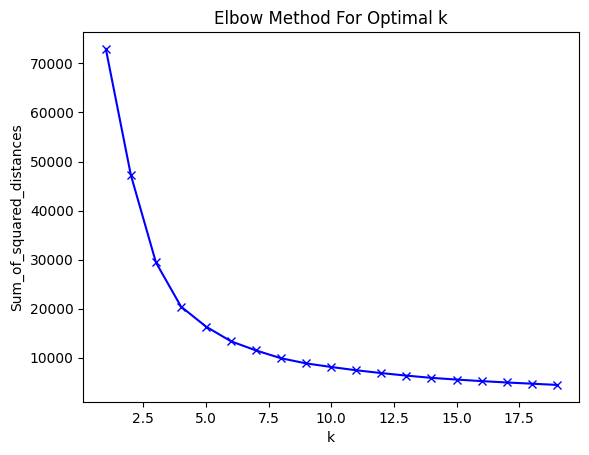

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
km_chosen = KMeans(n_clusters=5)
km_chosen = km_chosen.fit(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
km_chosen.labels_

array([3, 4, 4, ..., 4, 4, 4], dtype=int32)

In [ ]:
color = ['royalblue','red','deeppink','mediumorchid','tan','forestgreen','olive','goldenrod','lightcyan','navy']

In [ ]:
vectorizer = np.vectorize(lambda x:color[x % len(color)])

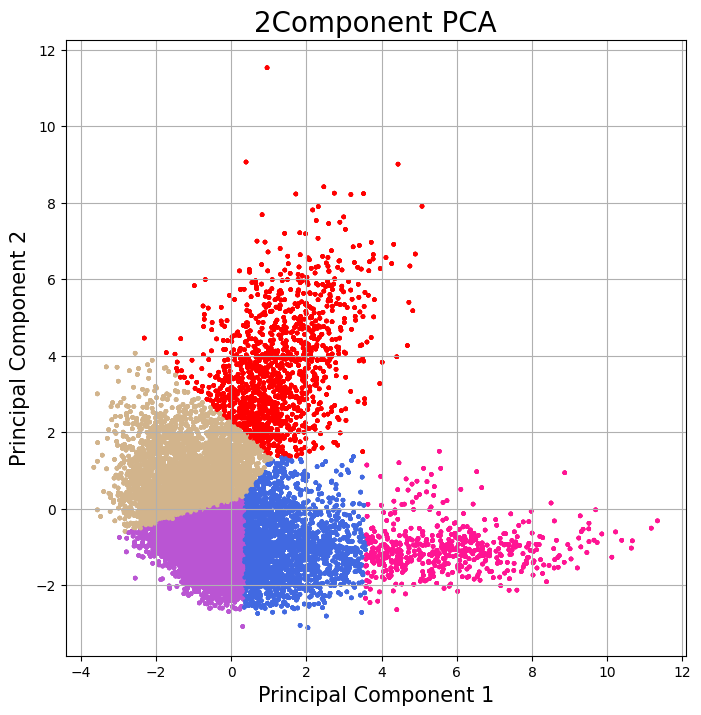

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2Component PCA', fontsize=20)

for lable in range(5):
    
    ax.scatter(data_pca[:,0],data_pca[:,1]
               ,s=5
               ,c=vectorizer(km_chosen.labels_))
ax.grid()
plt.show()


In [ ]:
tsne1=TSNE(n_components=2,perplexity=20,random_state=24680, learning_rate=1000,n_iter=1000)
X1_tsne=tsne1.fit_transform(X_train1)

In [ ]:
!git -C /content/deep-learning-egovision commit

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [ ]:
!git config --global user.email "izerbini99@gmail.com"
!git config --global user.name "Ilaria-Zerbini"

In [ ]:
!git -C /content/deep-learning-egovision pull

Already up to date.


In [ ]:
!ls -a /content/deep-learning-egovision/saved_models/I3D_SourceOnlyD2

.  ..  Oct25_22-56-23


In [ ]:
!rm -r  /content/deep-learning-egovision/saved_models/I3D_SourceOnlyD2/.ipynb_checkpoints